In [3]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides
!pip install git+https://github.com/renatopp/liac-arff@master
!pip install git+https://github.com/openml/openml-python.git@develop
!pip install mglearn
from IPython.display import set_matplotlib_formats, display, HTML
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml as oml
import mglearn
import os
from cycler import cycler
from pprint import pprint

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
#plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
                           cycler('linestyle', ['-', '--', ':',
                                                '-.', '--'])
                           )
       )

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

np, mglearn

# Prints outputs in cells so that we don't have to write print() every time 
#InteractiveShell.ast_node_interactivity = "all"

# Matplotlib tweaks for presentations
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["figure.max_open_warning"] = -1
plt.rcParams['font.size'] = 8; 
plt.rcParams['lines.linewidth'] = 0.5


# Presentations
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': '95%', 'height': 786, 'scroll': True, 'theme': 'solarized', 'transition': 'fade', 'overflow': 'visible', 'start_slideshow_at': 'selected'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np

  Cloning https://github.com/renatopp/liac-arff (to master) to /tmp/pip-4dkq1cl5-build
  Cloning https://github.com/openml/openml-python.git (to develop) to /tmp/pip-mn7weeho-build


Found GPU at: /device:GPU:0


## Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [ ]:
# Please fill in your names here
NAME_STUDENT_1 = "Georgiana Manolache 0876359"
NAME_STUDENT_2 = "Jan-Niklas Schneider 1260421"

In [ ]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
%matplotlib inline
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.

# InteractiveShell.ast_node_interactivity = "all" 
# HTML('''<style>html, body{overflow: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Support Vector Bananas (4 points (2+2))
We will first explore SVM kernels and hyperparameters on an artificial dataset representing multiple banana shapes. 

In [ ]:
from sklearn.model_selection import *
bananas = oml.datasets.get_dataset(1460) # Download banana data
X, y = bananas.get_data(target=bananas.default_target_attribute);
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/4)

1 . Evaluate how well an SVM classifier can fit the data. 

- Use a linear, polynomial and radial basis function (RBF) kernel, using their default hyperparameters. Evaluate the performance of each kernel using the test set and AUC. Which one works best? 
- Visualize the results using the visualization code also used in class (under mglearn/plot_svm.py > plot_svm_kernels). Also show the AUC score and the number of support vectors. Explain intuitively how well the data is fitted, why the kernel is (not) able to fit the data, whether it is under- or overfitting, etc.

In [34]:
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
    print("Kernel: {0}".format(kernel))
    print("Test set accuracy: {:.3f}".format(clf.score(X_test, y_test))) 
    print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, clf.decision_function(X_test))))     
    print("Number of supporting vectors: {0}\n".format(len(clf.support_vectors_[:]))) 

Kernel: linear
Test set accuracy: 0.547
Test set AUC: 0.506
Number of supporting vectors: 3613

Kernel: poly
Test set accuracy: 0.635
Test set AUC: 0.755
Number of supporting vectors: 3218

Kernel: rbf
Test set accuracy: 0.914
Test set AUC: 0.970
Number of supporting vectors: 1180



In [ ]:
def plot_kernel(clf, fignum, title):
  
    plt.figure(fignum, figsize=(8, 6))
    plt.suptitle(title)    

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=85, edgecolors='k', c='w', zorder=10, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.bwr, alpha=0.4)

    #for i, coef in enumerate(clf.dual_coef_[0]):
        #plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.figure(fignum, figsize=(8, 6))
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    
    print("Kernel: {0}".format(kernel))
    print("Test set accuracy: {:.3f}".format(clf.score(X_test, y_test))) 
    print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, clf.decision_function(X_test))))     
    print("Number of supporting vectors: {0}\n".format(len(clf.support_vectors_[:]))) 
    
    plt.show()

Kernel: linear
Test set accuracy: 0.547
Test set AUC: 0.506
Number of supporting vectors: 3613


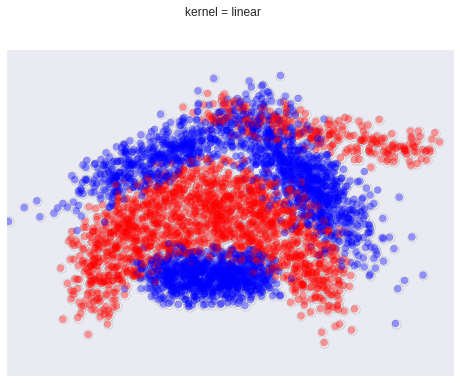

Kernel: poly
Test set accuracy: 0.635
Test set AUC: 0.755
Number of supporting vectors: 3218


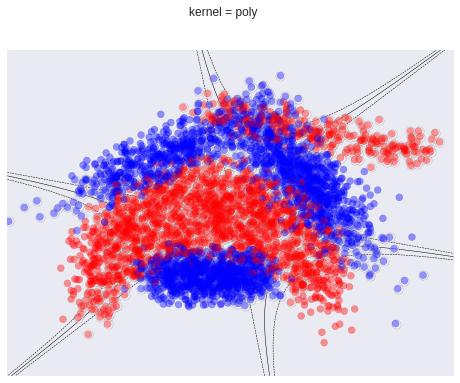

Kernel: rbf
Test set accuracy: 0.914
Test set AUC: 0.970
Number of supporting vectors: 1180


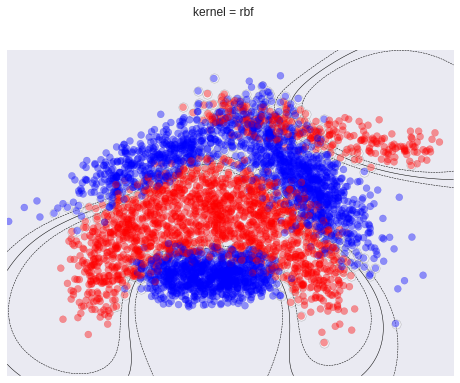

In [36]:
fignum = 1

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    plot_kernel(clf, fignum, 'kernel = %s' % kernel)
    fignum = fignum + 1

Radial basis function works (RBF) best, with AUC score of 0.97, even though it may be overfitting the data. In the absence of expert knowledge, the RBF kernel makes a good default kernel.

The other two kernels perform rather poorly. Linear and polynomial are underfitting the data. If training data fits poorly, of course results on the test data will be poor too. This may also be the case since the parameters were kept default. The linear kernel has no way to divide the data, since the elements of the two classes cannot be saparated by a straight line. The polynomial kernel performs slightly better: the curves can capture correctly some areas of the graph, but it is still not optimal. RBF performs the best, as it can capture the different zones of the data with greater precision.

We can conclude that the first two models underfit the data, while RBF performs the best. This can also be noted by observing the number of support vectors: the RBF kernel achieves a more defined separation of the two classes, resulting in a lower number of support vectors.






2 . Pick the RBF kernel and optimize the two most important hyperparameters (the $C$ parameter and the kernel width $\gamma$). 

- First, optimize manually using 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
- Next, optimize the hyperparameters using a grid search and 10-fold cross validation. Show a heatmap of the results snd report the optimal hyperparameter values.
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. Use at least 10 values for each.

In [ ]:
def plot_rbf_kernel(clf, fignum, title, fig):
    
    ax = fig.add_subplot(3,3,fignum)
    plt.title(title)

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=85, edgecolors='k', c='w', zorder=10, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.bwr, alpha=0.4)

    #for i, coef in enumerate(clf.dual_coef_[0]):
        #plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
  
    ax = fig.add_subplot(3,3,fignum)
    ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())

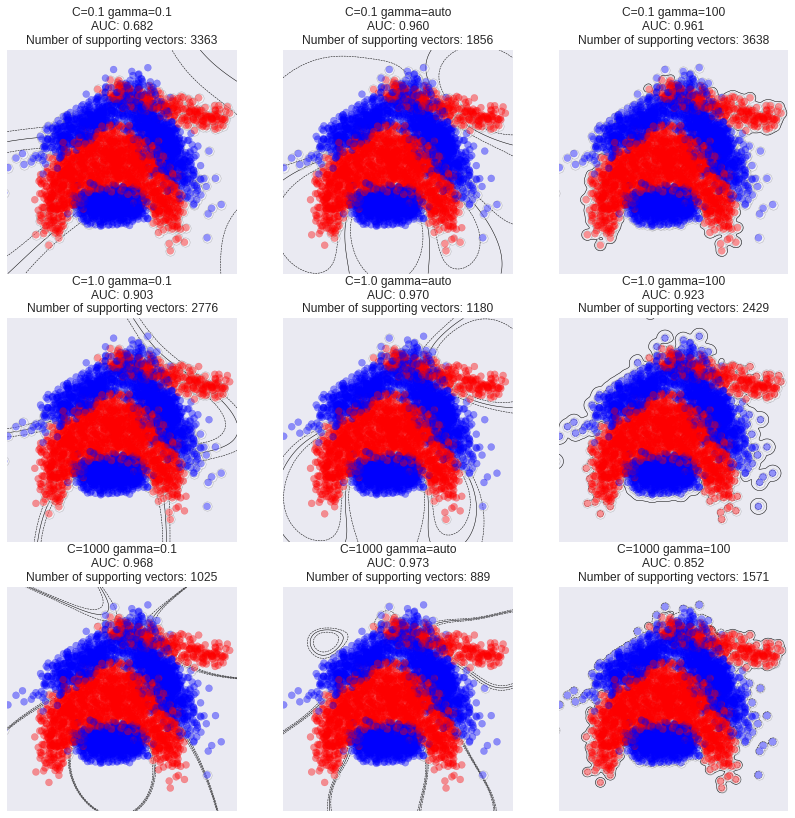

In [51]:
fignum = 1
fig = plt.figure(figsize=(14, 14))

for C in (0.1, 1.0, 32768):
    for gamma in (0.1, 'auto', 32768):  
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        title = "C={} gamma={}\nAUC: {:.3f}\nNumber of supporting vectors: {}".format(C, gamma, roc_auc_score(y_test, clf.decision_function(X_test)),len(clf.support_vectors_[:]))
        plot_rbf_kernel(clf, fignum, title, fig)
        fignum = fignum + 1
        
plt.show()

The best performance is obtained on largest $C$ (1000) and default $\gamma$ (1/n_features). Higher values of the $C$ make the decision boundaries margins smaller, where normally high values can generally cause overfitting. Already from $C$ = 1.0 we already obtain an acceptable perfomance.

Low $\gamma$ is underfitting, where zones are too broad to classify the data.
On the other hand, high value causes overfitting, as seen from the curves that isolate the single data points. The default setting gives the best result.

Test set score: 0.91
Best parameters: {'C': 3250.997354430875, 'gamma': 0.3149802624737184}
Best cross-validation score: 0.90
Best estimator:
SVC(C=3250.997354430875, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3149802624737184,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           0.42             0.03             0.55              0.55   
1           0.42             0.03             0.55              0.55   
2           0.42             0.03             0.55              0.55   
3           0.43             0.03             0.55              0.55   
4           0.45             0.03             0.55              0.55   

        ...        std_fit_time std_score_time std_test_score  std_train_score  
0       ...            8.06e-03       1.99e-03       6.25e-04         6.95e-05  
1       ...            7.36e-03       3.97e-04       6.25e-04         6.95e-05  
2       ...            6.66e-03       4.08e-04       6.25e-04         6.95e-05  
3       ...            9.40e-03       7.86e-04       6.25e-04         6.95e-05  
4       ...            3.76e-03       7.65e-04       6.25e-04         6.95e-05  

[5 rows x 32 columns]

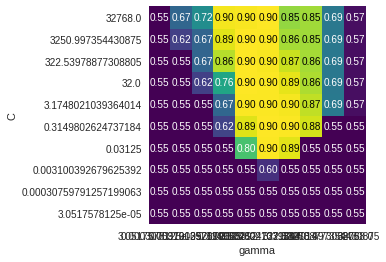

In [52]:
# cross validation
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

param_grid = {'C': np.logspace(-15, 15, 10, base=2),
               'gamma': np.logspace(-15, 15, 10, base=2)}

# grid search
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=10)
grid_search.fit(X_train, y_train)

# show info 
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# Convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# Show the first 5 rows
display(results.head())
scores = np.array(results.mean_test_score).reshape(10, 10)

# Plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis");


After performing GridSearch, the optimal parameters are $C$ in [0.03, 3250.99] and $\gamma$ in [0.30, 332]


## Building Kernels (4 points (0.5+0.5+1+2))

Consider the artificial dataset given below. It represents a sine wave with added noise.

1. Fit an SVM Regressor with the default RBF kernel, and plot the predictions on all data points in [0, 40]. 

    - Does it fit the data well? Does it extrapolate well (in the range [30,40])? Explain your findings. 
    - Can you get better results by tweaking the kernel or the other SVM parameters?
    
2. Implement your own linear kernel. This is a function that takes 2 vectors (arrays) and returns the dot product:

      $$k(\mathbf{x}_i,\,\mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j$$
    - Build an SVM regressor using that kernel by passing your kernel function as the `kernel` hyperparameter. 
    - Fit it on the sine data and plot the predictions on all data points. Interpret the results.
    
3. Since this data is periodic, it makes sense to implement a periodic kernel instead. 

    - This is the Exponential Sine Squared kernel, with length scale $\Gamma$ and periodicity $P$:
  $$k(\mathbf{x}_i,\,\mathbf{x}_j) = \exp \left( -\Gamma\,\sin^2\left[\frac{\pi}{P}\,\left|\left|x_i-x_j\right|\right|\right]\right)$$
    - Implement it, using the defaults $\Gamma=1$, periodicity $P=1$, and Euclidean distance.
    - Train an SVM regressor with it, fit in on the same data and plot the result. Interpret the outcome. 
    - Think about what $\Gamma$ and $P$ represent. Can you improve the fit by manually adjusting them? Explain your findings.
    - Optimize $\Gamma$ and periodicity $P$ (using `true_y` as the ground truth). Use a grid search or random search, $\Gamma \in [0,1]$, $P \in [1,100]$, try at least 5 values for each.

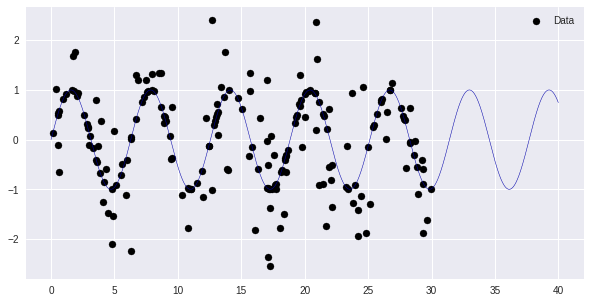

In [4]:
# Generate sample data
rng = np.random.RandomState(0) # Random seed, for reproducibility 
X = 30 * rng.rand(200, 1)
y = np.sin(X).ravel() 
y[::2] += rng.normal(scale = 1.0, size = X.shape[0] // 2) # adds noise

X_plot = np.linspace(0, 40, 10000)[:, None] # A larger range to evaluate on
true_y = np.sin(X_plot) # and the 'true' target function

plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='k', label='Data')
plt.legend()
plt.plot(X_plot, true_y);

Building kernels task 1

In [5]:
print(X.shape)
print(y.shape)
print(X_plot.shape)
print(true_y.shape)

(200, 1)
(200,)
(10000, 1)
(10000, 1)


In [ ]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_plot, true_y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 1)
(2500, 1)
(7500, 1)
(2500, 1)


In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

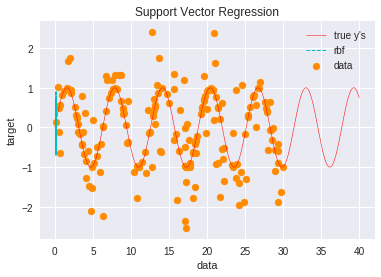

In [21]:

lw = 1
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, true_y, color='red', label='true y\'s');
plt.plot(X_plot[30:40:1], y_pred[30:40:1], color='c', lw=lw, label='rbf')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

This looks pretty bad. The data does not seem to fit in any kind of onto the line. We attempt to tweak parameters gamma and C.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [23]:
pipe = Pipeline([
    ('svr', SVR(kernel='rbf'))
])

gamma = [0.1, 1, 10, 100, 1000]
c = [0.1, 1, 10 ,100, 1000]
params = [{'svr__gamma': gamma,
           'svr__C': c}]

grid = GridSearchCV(estimator=pipe, param_grid=params)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'svr__gamma': [0.1, 1, 10, 100, 1000], 'svr__C': [0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


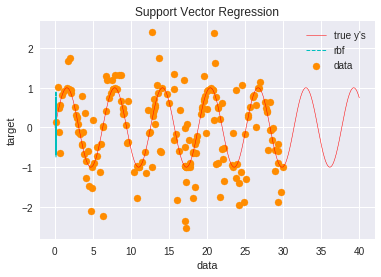

In [24]:
result = grid.best_estimator_.named_steps['svr']
print(result)

y_pred = result.predict(X_test)
lw = 1
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, true_y, color='red', label='true y\'s');
plt.plot(X_plot[30:40:1], y_pred[30:40:1], color='c', lw=lw, label='rbf')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Even though the parameter of the SVM Regressor were optimized using GridSearch the results are visually alike. The first and second plot have same graphs. The rbf kernel may be very unsuited for a sine function.

Building kernels task 2

In [ ]:
# our linear kernel
def linear_kernel(vec_a, vec_b):
        return np.dot(vec_a, vec_b.T)

In [ ]:
svr_lin = SVR(kernel=linear_kernel)
svr_lin.fit(X_train, y_train)

y_pred_lin = svr_lin.predict(X_test)

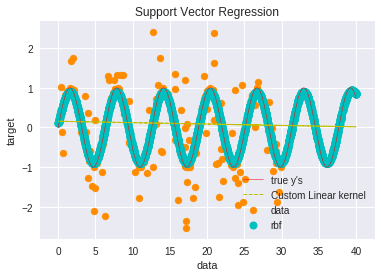

In [27]:
lw = 1
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, true_y, color='red', label='true y\'s');
plt.scatter(X_test, y_pred, color='c', lw=lw, label='rbf')
plt.plot(X_test, y_pred_lin, color='y', lw=lw, label='Custom Linear kernel')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In the plot above we see the result of the custom linear kernel which calculates the dot product of two vectors. As can be seen the result shows the linear function at the middlepoint of the sine function. This result is not unsurprising since the kernel aims to fit all data points best which would be the midpoint of the sine curve. At the midpoint the linear kernel has on average the best distance to the data points and variance of length will be smallest on average.

Building kernels task 3

In [ ]:
from scipy.spatial.distance import cdist
#  I tried it out to see if my implementation is the same. It indeed is.
# from sklearn.gaussian_process.kernels import ExpSineSquared
# def exponential_sine_squared_kernel(vec_a, vec_b, s=1, p=25):

def define_s_p_kernel(s=1,p=25):
  def exponential_sine_squared_kernel(vec_a, vec_b):
      pi_over_p = np.pi / p
      mag_vec_a_minus_vec_b = cdist(vec_a, vec_b, metric='euclidean')
      sine_ = np.sin(pi_over_p * mag_vec_a_minus_vec_b)
      return np.exp(-s * sine_ ** 2)
  return exponential_sine_squared_kernel

In [ ]:
svr_sine = SVR(kernel=exponential_sine_squared_kernel)

y_pred_sine = svr_sine.fit(X_train, y_train).predict(X_test)

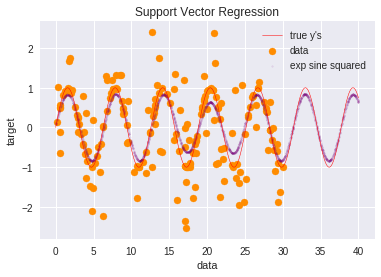

In [30]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, true_y, color='red', label='true y\'s')
plt.scatter(X_test, y_pred_sine, color='purple',alpha=0.1, s=3, label='exp sine squared')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Before the scale (S) and periodicity (P) were optimized the plot looked very similar to the plot of the linear kernel. After manually adjusting the values we get something that indeed resembles a sine curve. The S values have impact on stretching the data out on the x-axes of the plot such that very large value would create also a very large x-scale. On the other hand, we have P which detemermines the wavelength of the function or also called $\Lambda$.

In [32]:
pipe = Pipeline([
    ('svr', SVR())
])

gamma = [0.1, 1, 10, 100, 1000]
c = [0.1, 1, 10 ,100, 1000]
params = [{'svr__gamma': gamma,
           'svr__C': c,
            'svr__kernel':[define_s_p_kernel(s, p)
                            for s in np.arange(0.1, 1, 0.1)
                            for p in np.arange(1, 100, 10)]
          }]

grid = GridSearchCV(estimator=pipe, param_grid=params)
grid.fit(X_train, y_train)

KeyboardInterrupt: ignored

This code above is supposed to find best values for the kernel using grid search, however, it had such a high running time that we were not able to run it ever completly.

4 . We now make the problem a bit more challenging by adding an upward trend:

- Fit the same SVM using the optimal parameters from the previous subtask and plot the results. Do they still work? Explain what you see.
- Fit a Gaussian process (GP) using the kernels given below. First use the singular ExpSineSquared kernel (the implementation provided by sklearn this time), then build a new kernel consisting of the 3 components given below. Use both to predict all points for the "rising noisy sine" data and plot the results as usual. Interpret the results.
    - For the GP, it may help to use `normalize_y=True` since the y-values are not around 0. Setting `alpha=0.1` may help with possible numerical issues, otherwise keep it at 0.
- Also plot the _uncertainty interval_ around the predictions. You can ask the GP to return the standard deviation during prediction with the `return_std=True` hyperparameter. Plot a band 2 standard deviations above and below the prediction. You can use MatPlotLib's `fill_between` as shown in class.
    - You can combine the 3 models in one plot for easy comparison.
- We've provided reasonable values for the kernel hyperparameters above. Can you optimize them further to get an even better fit? Think about what the hyperparameters do and optimize the ones you think are most worth tuning.

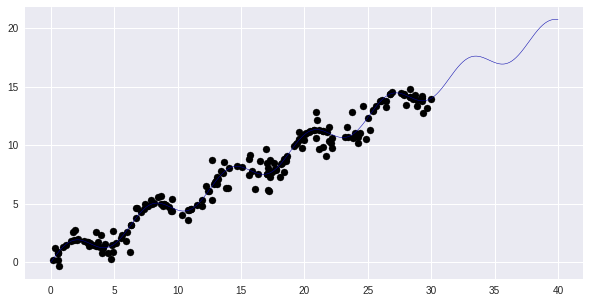

In [12]:
# Generate sample data with added trend
rng = np.random.RandomState(0)
X = 30 * rng.rand(200, 1)
y = X.ravel()/2 + np.sin(X).ravel()
y[::2] += rng.normal(scale = 1.0, size = X.shape[0] // 2)  # add noise

X_plot = np.linspace(0, 40, 10000)[:, None]
true_y = X_plot/2 + np.sin(X_plot)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y);

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_plot, true_y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 1)
(2500, 1)
(7500, 1)
(2500, 1)


In [ ]:
def exponential_sine_squared_kernel_2(vec_a, vec_b, s=1 , p=25):
      pi_over_p = np.pi / p
      mag_vec_a_minus_vec_b = cdist(vec_a, vec_b, metric='euclidean')
      sine_ = np.sin(pi_over_p * mag_vec_a_minus_vec_b)
      return np.exp(-s * sine_ ** 2)

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel=exponential_sine_squared_kernel_2)

y_pred = svr.fit(X_train, y_train).predict(X_test)

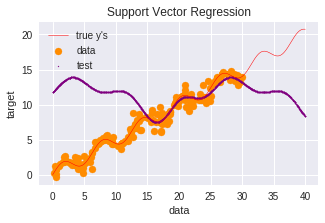

In [17]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, true_y, color='red', label='true y\'s');
plt.scatter(X_test, y_pred, color='purple', s=1, label='test')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

The optimized values do not seem work anymore. Even though the kernel fits the data well ranging from 17 to 20, the remaining data points are poorly fitted by the kernel. Thus the values are not well represented by the kernel.

In [ ]:
import sklearn.gaussian_process.kernels

# Replace `length_scale` and `periodicity` with the values found in the previous part.
kernel_simple = sklearn.gaussian_process.kernels.ExpSineSquared(length_scale=1, periodicity=25) # periodic component

k1 = 4300 * sklearn.gaussian_process.kernels.RBF(length_scale=70.0)  # long term smooth rising trend
k2 = 6 * sklearn.gaussian_process.kernels.RBF(length_scale=90.0) * sklearn.gaussian_process.kernels.ExpSineSquared(length_scale=1.3, periodicity=1.0)  # periodic component
k3 = 0.03 * sklearn.gaussian_process.kernels.RBF(length_scale=0.134) + sklearn.gaussian_process.kernels.WhiteKernel(noise_level=0.035)  # noise terms

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

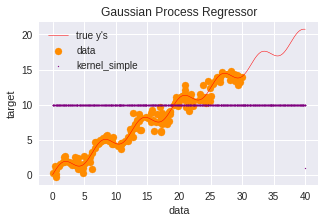

In [25]:
gpr = GaussianProcessRegressor(normalize_y=True, alpha=0.1, kernel=kernel_simple)
y_pred = gpr.fit(X_train, y_train).predict(X_test)

plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, true_y, color='red', label='true y\'s');
plt.scatter(X_test, y_pred, color='purple', s=1, label='kernel_simple')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Gaussian Process Regressor')
plt.legend()
plt.show()

In [26]:
combined_kernel = k1 + k2 + k3
print(combined_kernel)

65.6**2 * RBF(length_scale=70) + 2.45**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.173**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.035)


In [ ]:
gpr = GaussianProcessRegressor(kernel=combined_kernel)#normalize_y=True, alpha=0.1j
y_pred = gpr.fit(X_train, y_train).predict(X_test)

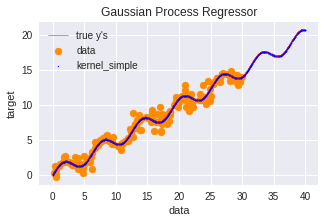

In [24]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, true_y, color='red', label='true y\'s');
plt.scatter(X_test, y_pred, color='blue', s=1, label='kernel_simple')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Gaussian Process Regressor')
plt.legend()
plt.show()

In [ ]:
y_pred1, sigma = gpr.predict(X_test, return_std=True)

In [29]:
print(y_pred1)
print(sigma)

[[ 7.851]
 [ 4.607]
 [ 1.433]
 ...
 [10.696]
 [ 4.803]
 [ 1.549]]
[0.    0.004 0.    ... 0.003 0.016 0.   ]


In [ ]:
# Whenever we attempted to run plt.fill it would simply crash, or return a grey 'plot'. Thus, we were not able to complete this. 

plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, true_y, color='red', label='true y\'s');
plt.scatter(X_test, y_pred1, color='blue', s=1, label='combined kernel')

plt.errorbar(X_plot.ravel(), true_y, fmt='r.', markersize=1, label=u'Observations')

plt.fill(np.concatenate([X_test, X_test[::-1]]),
         np.concatenate([y_pred1 - 1.9600 * sigma,(y_pred1 + 1.9600 * sigma)[::-1]]), alpha=.5, fc='b', ec='None', label='95% confidence interval')

# plt.fill_between(X_test[:, 0], y_pred1 - sigma, y_pred1 + sigma, color='darkorange',alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.fill(X_test, y_pred1 - 1.9600 * sigma, y_pred1 + 1.9600 * sigma, alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Gaussian Process Regressor')
plt.legend()
plt.show()

*   List item
*   List item



## Bayesian updates (3 points (2+1))

We consider real data about solar radiation measured by a weather balloon:
https://www.openml.org/d/512. We'll use only the raw data (at least the first 1000 points) and try to learn the (very noisy) trend. 

1. Train a Gaussian process on an increasing amount of samples of the training data. Use a simple RBF kernel:
`RBF(10, (1e-2, 1e2))`

 - Start with 10 _random_ samples and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Also compute $R^2$ on the training data.
 - Repeat and 10 more points, retrain and redraw. Do this a couple of times and interpret/explain what you see. 
 
2. Train the Gaussian on the full training set.

 - Plot the predictions (including the uncertainty interval) on the full dataset. Evaluate on the test set using $R^2$ 
 - Interpret the results. Is the kernel right? Is the GP under/overfitting?
 - Try to improve the results by tuning the kernel. Do this either manually or using a small grid/random search.

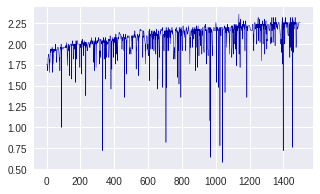

In [17]:
# Get the data
balloon_data = oml.datasets.get_dataset(512) # Download Balloon data
X, y = balloon_data.get_data(target=balloon_data.default_target_attribute);

train = X[:1000]
test = X[1000:1500]
X_train = np.array(list(range(1000)))[np.newaxis].T
y_train = X[:1000].reshape(-1, 1)
X_test = np.array(list(range(1000,1250)))[np.newaxis].T
y_test = X[1000:1500].reshape(-1, 1)
X_all = np.array(list(range(1500)))[np.newaxis].T

pd.Series(X[:1500,0]).plot()

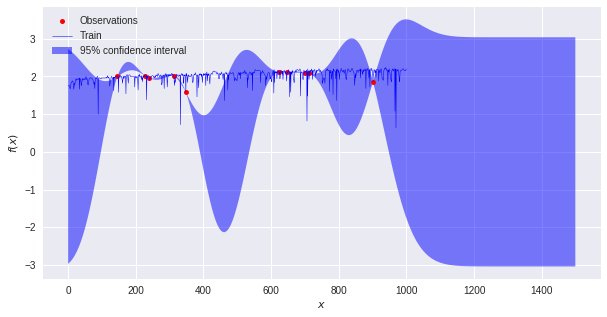

Score: -37.97187675226481


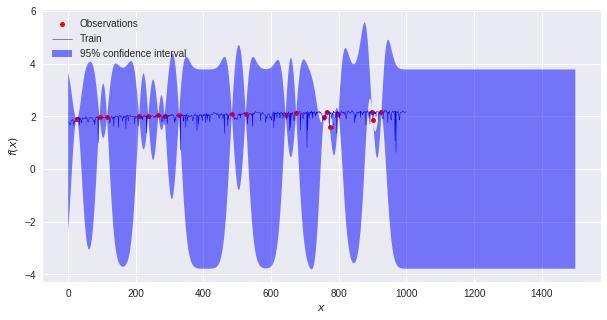

Score: -61.68690610138954


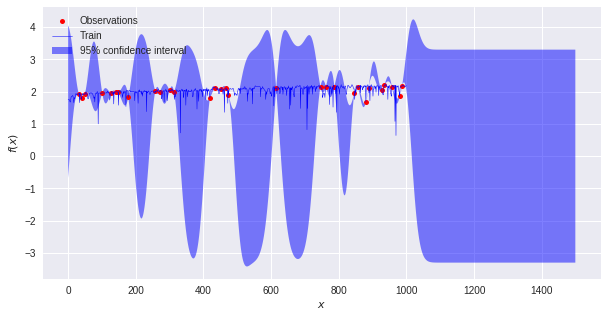

Score: -40.117534160323


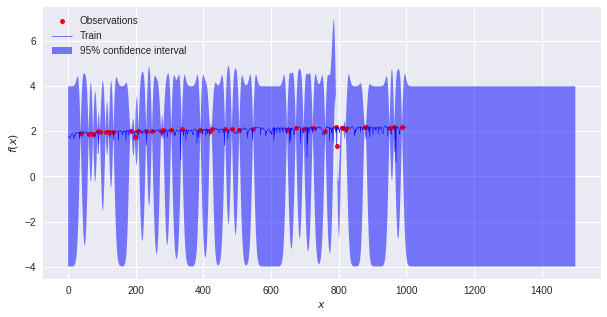

Score: -68.65845886328437


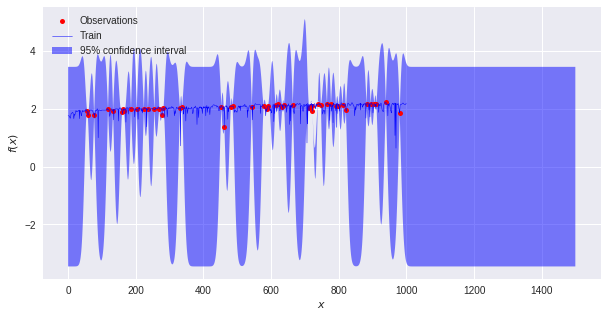

Score: -51.033047110451434


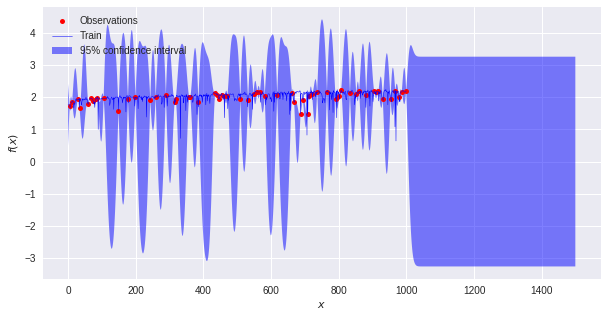

Score: -14.071953300843898


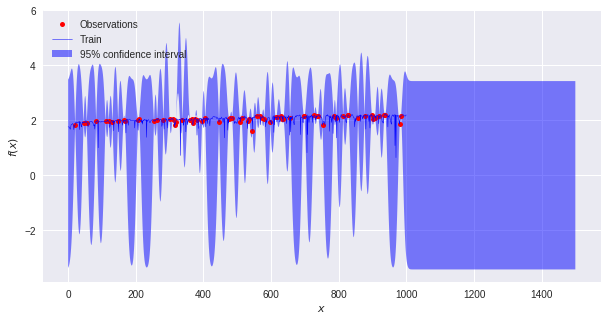

Score: -26.950246707539616


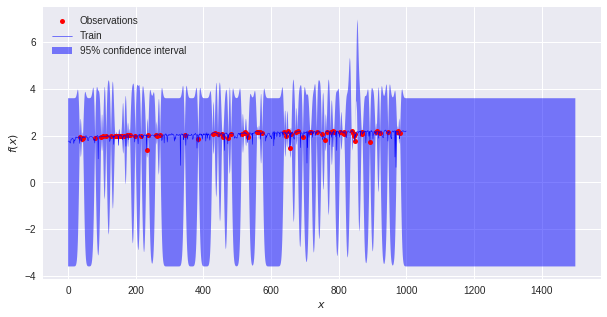

Score: -61.33927345024166


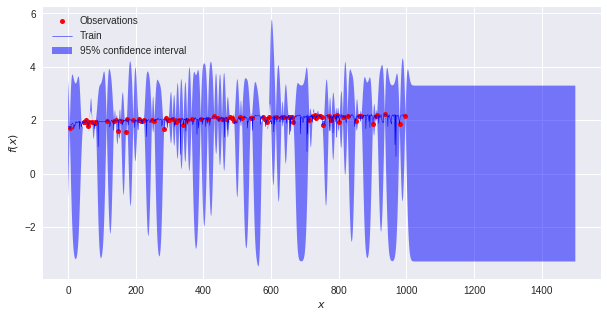

Score: -29.732343175887237


In [28]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import random
from sklearn.metrics import r2_score

X_test = np.array(list(range(1000,1250)))[np.newaxis].T
y_test = X[1000:1500].reshape(-1, 1)

for samples in range(1,10):
    i = sorted(random.sample(list(range(1000)),10*samples))
    X_sample = np.asarray([X_train[i] for i in i])
    y_sample = np.asarray([y_train[i] for i in i])
   
    # Instanciate a Gaussian Process model
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    
    gp = GaussianProcessRegressor(kernel=kernel, 
                                  n_restarts_optimizer=9)

    # Fit to data using Maximum Likelihood Estimation of the parameters
    fit=gp.fit(X_sample, y_sample)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(X_all, return_std=True)
    y_pred = y_pred[:,0]
    y_predtrain, sigmatest = gp.predict(X_train, return_std=True)
    y_predtrain = y_predtrain[:,0]
    
    
    # Plot the function, the prediction and the 95% confidence interval based # the MSE
    fig = plt.figure(figsize=(10, 5))
    plt.plot(X_sample, y_sample, 'r.', markersize=10, label=u'Observations')
    plt.plot(X_train, y_train, 'b-', label=u'Train')
    #plt.plot(X_test, y_test, 'y-', label=u'Test')
    plt.fill(np.concatenate([X_all, X_all[::-1]]),
                 np.concatenate([y_pred.ravel() - 1.9600 * sigma,
                                 (y_pred.ravel() + 1.9600 * sigma)[::-1]]),
                 alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend(loc='upper left')
    
    plt.show()
    
    score=r2_score(y_train, y_predtrain)
    print("Score: {0}".format(score))


With large gaps in the horizontal data, variation is inevitable. While thinking that by making it smaller the logical flow would become smaller too, that is not the case here; the data is rather spikey. As we train the algorithm to basically hit every single point there can only be a highly fluctating expected line. Thus, the spikes can be quite extreme in an attempt to hit every single point on the line.

The major problem here is the discrepency between theory and realism. The data is actually measured data and measurement equipment can be off. Normally, one would trim extremes as those outliers are arguable measurement erros. This has not the case here.

Furthermore, because data is measured and each physical measuring equipment has a margin of error, instead of searching a formula that fits all points, better follows trends of all points (e.g. mean of the nearest n points).


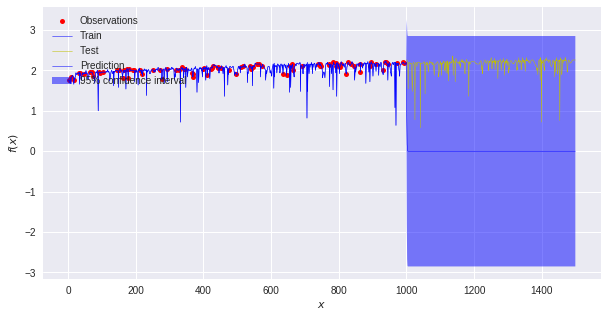

Score of training data: -153.36356091941187


In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import random
from sklearn.metrics import r2_score

X_test = np.array(list(range(1000,1500)))[np.newaxis].T
y_test = X[1000:1500].reshape(-1, 1)

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
fit=gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X_all, return_std=True)
y_pred = y_pred[:,0]

y_predtest, sigmatest = gp.predict(X_test, return_std=True)
y_predtest = y_predtest[:,0]

# Plot the function, the prediction and the 95% confidence interval based # the MSE
fig = plt.figure(figsize=(10, 5))
plt.plot(X_sample, y_sample, 'r.', markersize=10, label=u'Observations')
plt.plot(X_train, y_train, 'b-', label=u'Train')
plt.plot(X_test, y_test, 'y-', label=u'Test')
plt.plot(X_all, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([X_all, X_all[::-1]]),
             np.concatenate([y_pred.ravel() - 1.9600 * sigma,
                             (y_pred.ravel() + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')

plt.show()

score=r2_score(y_test, y_predtest)
print("Score of training data: {0}".format(score))


GP is overfitting. As we train the algorithm hits every single point.

In [33]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import random
from sklearn.metrics import r2_score

X_test = np.array(list(range(1000,1500)))[np.newaxis].T
y_test = X[1000:1500].reshape(-1, 1)
opt_score = -300
opt_kernel = 1.0 * RBF(1.0)

for x in [1,20,50]:
    for y in [(1e-5, 1e5), (1e-10, 1e10), (1e-15, 1e15)]:
        for alpha in [0.01, 1, 10]:
            
              #Instanciate a Gaussian Process model
              kernel = 1.0 * RBF(x, y)
              gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha, n_restarts_optimizer=0 )
             
              gp.fit(X_train, y_train)
                          
              y_predtest, sigmatest = gp.predict(X_test, return_std=True)
              
              score = r2_score(y_test, y_predtest)
              
              print("Score: {0}, with parameters x={1} y={2} n={3} alpha={4}".format(score,x,y,n_restarts_optimizer,alpha))
              
              if score > opt_score:
                opt_score = score
                opt_kernel = kernel 
                
print("Optimal score: {:.2f}".format(opt_score))

Score: -1.2913438776486172, with parameters x=1 y=(1e-05, 100000.0) n=0 alpha=0.01
Score: 0.01825389828887425, with parameters x=1 y=(1e-05, 100000.0) n=0 alpha=1
Score: -0.6802240605782839, with parameters x=1 y=(1e-05, 100000.0) n=0 alpha=10
Score: -0.6394457615787923, with parameters x=1 y=(1e-10, 10000000000.0) n=0 alpha=0.01
Score: -0.6439320011162095, with parameters x=1 y=(1e-10, 10000000000.0) n=0 alpha=1
Score: -0.6854351673121117, with parameters x=1 y=(1e-10, 10000000000.0) n=0 alpha=10
Score: -0.6394457785484229, with parameters x=1 y=(1e-15, 1000000000000000.0) n=0 alpha=0.01
Score: -0.6439319883935495, with parameters x=1 y=(1e-15, 1000000000000000.0) n=0 alpha=1
Score: -0.6854340981370284, with parameters x=1 y=(1e-15, 1000000000000000.0) n=0 alpha=10
Score: -0.20802199897751117, with parameters x=20 y=(1e-05, 100000.0) n=0 alpha=0.01
Score: 0.0182538617687652, with parameters x=20 y=(1e-05, 100000.0) n=0 alpha=1
Score: -0.6802237589274134, with parameters x=20 y=(1e-05,

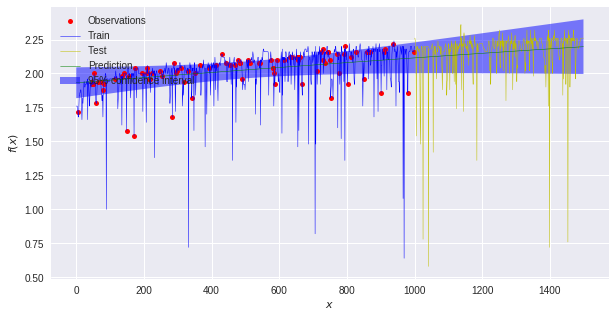

Score of training data: 0.018253837760225267


In [39]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import random
from sklearn.metrics import r2_score

# Instanciate a Gaussian Process model
#kernel = 1.0 * RBF(x, y)

gp = GaussianProcessRegressor(kernel=kernel, 
                              n_restarts_optimizer=9, alpha=1)

# Fit to data using Maximum Likelihood Estimation of the parameters
fit=gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X_all, return_std=True)
y_pred = y_pred[:,0]

y_predtest, sigmat = gp.predict(X_test, return_std=True)
y_predtest = y_predtest[:,0]


# Plot the function, the prediction and the 95% confidence interval based # the MSE
fig = plt.figure(figsize=(10, 5))
plt.plot(X_sample, y_sample, 'r.', markersize=10, label=u'Observations')
plt.plot(X_train, y_train, 'b-', label=u'Train')
plt.plot(X_test, y_test, 'y-', label=u'Test')
plt.plot(X_all, y_pred, 'g-', label=u'Prediction')
plt.fill(np.concatenate([X_all, X_all[::-1]]),
             np.concatenate([y_pred.ravel() - 1.9600 * sigma,
                             (y_pred.ravel() + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')

plt.show()

score=r2_score(y_test, y_predtest)
print("Score of training data: {0}".format(score))


First, default parameters of the Gaussian Process were tested. Beacuse of noisy data, the GP heavily overfit, giving very low results (-0.153). After the regularization, the GP already gave much better performances, with less overfitting and a better confidence interval. Then, we manually tuned the kernel parameters in order to achieve an even higher score. We chose to tune the parameters manually, as it runs much faster. Alpha parameter was also added and tested with several values. With alpha=1, we opbtained a final score of approximately 0.02.



## A data mining challenge (4 points)

The goal here is to use everything you have learned to build the best model for a given classification task. We will use two tasks hosted on OpenML, so you will all receive the same cross-validation splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection, pipeline building, and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial. You need to optimize the AUROC score (calculated using 10-fold cross0-validation).

- Challenge 1: Detects accents in speech data.

    - The OpenML Task ID is 167132: https://www.openml.org/t/167132
    - The dataset description can be found here: https://www.openml.org/d/40910
    - Leaderboard: https://www.openml.org/t/167132#!people
    
- Challenge 2: Image recognition (CIFAR-10 subsample).

    - The OpenML Task ID is 167133: https://www.openml.org/t/167133
    - The dataset description can be found here: https://www.openml.org/d/40926
    - Leaderboard: https://www.openml.org/t/167133#!people
    - Note that this is a high-dimensional dataset (and not so small). Think carefully about how to run experiments in the  time available.
    
- You are able to see the solutions of others (by clicking in the timeline or run list), so you can learn from prior experiments (what seems to work, how long does it take to train certain models, ...). Resubmission of the exact same solution is not possible.
- You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- Document the different experiments that you ran in this notebook (running them can of course be done outside of the notebook). For each experiment, provide a description of how and why you chose the algorithms and parameters that you submitted. Reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows (independently for each task):

    - 1 point for the breadth of experiments you ran (algorithms, pipelines, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Exception: simply repeating top models with nearly identical hyperparameters. This will be checked on the timeline.
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the leaderboard.
        
Note: Report the AUC scores of your best models in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.

In [10]:
speech = oml.datasets.get_dataset(40910) 
# Get the predictors X and the target y
X, y, attribute_names = speech.get_data(target=speech.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
speechframe = pd.DataFrame(X, columns=attribute_names)
speechframe.describe()

V1       V2       V3       V4   ...        V397     V398     V399  \
count  3686.00  3686.00  3686.00  3686.00   ...     3686.00  3686.00  3686.00   
mean     -0.19     0.11     0.22     0.21   ...        0.44     0.59    -0.06   
std       0.90     0.90     0.94     0.90   ...        0.87     0.87     0.93   
min      -3.47    -3.72    -3.88    -3.22   ...       -2.54    -2.67    -4.10   
25%      -0.79    -0.50    -0.40    -0.39   ...       -0.13     0.01    -0.67   
50%      -0.17     0.11     0.23     0.22   ...        0.45     0.60    -0.07   
75%       0.41     0.71     0.86     0.79   ...        0.99     1.18     0.56   
max       3.36     3.52     3.32     3.40   ...        3.43     3.58     3.69   

          V400  
count  3686.00  
mean      0.13  
std       0.92  
min      -3.30  
25%      -0.49  
50%       0.15  
75%       0.73  
max       3.48  

[8 rows x 400 columns]

In [11]:
print(X.shape)
print(y.shape)

(3686, 400)
(3686,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(speechframe, y)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

In [14]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif

# A naive implementation to see performance
steps = [('anova', SelectPercentile(score_func=f_classif, percentile=10)),
                ('svc', SVC())]

pipe = Pipeline(steps)
                 
pipe.fit(X_train, y_train)
                

Pipeline(memory=None,
     steps=[('anova', SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x7fc924af8950>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [ ]:
y_pred = pipe.predict(X_test)


In [16]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[910   0]
 [ 12   0]]


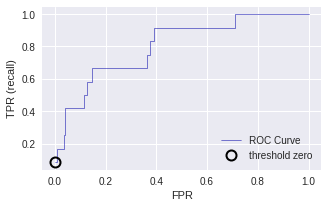

In [17]:
from sklearn.metrics import roc_curve



fpr, tpr, thresholds = roc_curve(y_test, pipe.named_steps['svc'].decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

The ROC curve shows precision and recall. that confusion matrix shows indeed a very well performing classifier. Are 10% of the features representable for the remaining data? We will analyze this and also tune hyperparameters and try different kernels. THe model is clearly not optimized.

In [ ]:
#@title
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
          ('anova', SelectPercentile(score_func=f_classif)),
                ('svc', SVC())]
params = [{'anova__percentile':[5,10,20,30,40,50],
          'svc__C':[0.1,0.25,0.5,0.75,0.9,1],
          'svc__kernel':['rbf','poly','linear']}]
pipe = Pipeline(steps)
grid = GridSearchCV(estimator=pipe, param_grid=params, verbose=True, cv=10)

In [20]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  7.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('anova', SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x7fc924af8950>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'anova__percentile': [5, 10, 20, 30, 40, 50], 'svc__C': [0.1, 0.25, 0.5, 0.75, 0.9, 1], 'svc__kernel': ['rbf', 'poly', 'linear']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [ ]:
grid_pred = grid.predict(X_test)

In [22]:
print(grid.best_params_)
print(grid.best_score_)

{'anova__percentile': 5, 'svc__C': 0.1, 'svc__kernel': 'rbf'}
0.9822720694645442


In [23]:
print(confusion_matrix(y_test, grid_pred))

[[910   0]
 [ 12   0]]


In [24]:
from sklearn.metrics import roc_auc_score

svc_auc = roc_auc_score(y_test, grid.best_estimator_.decision_function(X_test))
print(svc_auc)


0.6439560439560439


In [26]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{0: 3625, 1: 61}


In [ ]:
from sklearn.decomposition import PCA
steps = [('scaler', StandardScaler()),
          ('pca', PCA()),
                ('svc', SVC())]
params = [{'svc__C':[0.1,0.25,0.5,0.75,0.9,1],
          'svc__kernel':['rbf','poly','linear']}]
pipe = Pipeline(steps)
grid = GridSearchCV(estimator=pipe, param_grid=params, verbose=True, cv=10)

In [32]:
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  6.8min finished


In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(grid.best_params_)
print(grid.best_score_)


[[910   0]
 [ 12   0]]
{'svc__C': 0.1, 'svc__kernel': 'rbf'}
0.9822720694645442
0.8863553113553113


In [ ]:
# flow = oml.flows.sklearn_to_flow(grid)
# run = oml.runs.run_flow_on_task(task, flow)
# myrun = run.publish()


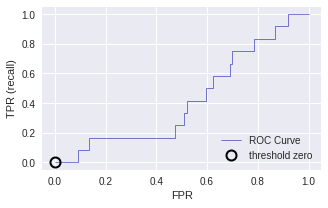

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, grid.best_estimator_.named_steps['svc'].decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

In [40]:
svc_auc = roc_auc_score(y_test, grid.best_estimator_.decision_function(X_test))
print(svc_auc)

0.8863553113553113


In this we have roughly 400 features which is mostly difficult on performance of most algorithms. We attempted two more successful ways of feature selection. The initial attempt is to select features based on a percentile using anova, the second attempt is to reduce dimensionality with PCA. This data is especially difficult since speech anomalies are barely present in the data which creates a large bias to the other class. We saw that in our tests SVC performed decently well. Hence, we decided to utilize this algorith which may very likely be suitable for a binary classification task.

---
The anova algorithm did not well perform we see that after optimization the AUC is rougly 65%. With PCA, however, we get an AUC score of 89% which is much better.



**SECOND CHALLANGE**

In [41]:
img = oml.datasets.get_dataset(40926) 
# Get the predictors X and the target y
X, y, attribute_names = img.get_data(target=img.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
imgframe = pd.DataFrame(X, columns=attribute_names)
imgframe.describe()

a0        a1        a2        a3    ...        a3068     a3069  \
count  20000.00  20000.00  20000.00  20000.00    ...     20000.00  20000.00   
mean     131.27    130.66    131.67    132.50    ...       114.46    114.48   
std       73.54     72.60     72.39     71.97    ...        64.76     64.97   
min        0.00      0.00      0.00      0.00    ...         0.00      0.00   
25%       71.00     71.00     73.00     74.00    ...        64.00     64.00   
50%      128.00    127.00    129.00    130.00    ...       106.00    106.00   
75%      190.00    189.00    190.00    190.00    ...       158.00    159.00   
max      255.00    255.00    255.00    255.00    ...       255.00    255.00   

          a3070     a3071  
count  20000.00  20000.00  
mean     114.55    115.22  
std       65.42     66.25  
min        0.00      0.00  
25%       64.00     64.00  
50%      106.00    106.00  
75%      159.00    160.00  
max      255.00    255.00  

[8 rows x 3072 columns]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/4) #25-75 split on small dataset, less than 10%

print(X.shape)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

(20000, 3072)
X_train shape: (15000, 3072)
y_train shape: (15000,)
X_test shape: (5000, 3072)
y_test shape: (5000,)


In [ ]:
#@title
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [1, 10, 50, 100], 'leaf_size': [30, 40, 50] }
grid_knn = RandomizedSearchCV(KNeighborsClassifier(n_jobs=2), param_distributions = params, cv=10)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)

params = {'n_estimators': [10, 25, 50, 100] }
grid_forest = RandomizedSearchCV(RandomForestClassifier(n_jobs=2), param_distributions=params, cv=10, n_iter=4)
grid_forest.fit(X_train, y_train)
print(grid_forest.best_params_)

In this assignment, the dataset is a subset of CIFAR10. There are 20,000 labeled instances of 32x32 color images, classified into 10 classes. This implies image classification problem.

We used two classifiers: KNNeighbors and RandomForest. Unfortunately, these two classifiers did not run completely. They have incredebly long running time. We considered other algorithms, namely SVM or Gaussian processes. These algorithms, however, have downsides considering the task. Eventhough SVM is suitable for high-dimensional data, it is not capable of a sample size as given in the task. Gaussian processes does not perform well on high-dimensional in general, thus, it was not utilized in any attempt.